In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load the dataset from a TSV file
# Using cp1252 encoding because it may contain special characters
df = pd.read_csv(r"..\data\stage\readmissions_export.csv")
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_medications,...,number_outpatient,number_emergency,number_inpatient,A1Cresult,max_glu_serum,readmit_30d,los_group,age_group,risk_score,risk_category
0,2278392,8222157,Caucasian,Female,0-10,6,25,1,41,1,...,0,0,0,NaN,NaN,0,Short,Young,0,Low
1,149190,55629189,Caucasian,Female,10-20,1,1,3,59,18,...,0,0,0,NaN,NaN,0,Short,Young,2,Medium
2,64410,86047875,African American,Female,20-30,1,1,2,11,13,...,2,0,1,NaN,NaN,0,Short,Young,2,Medium
3,500364,82442376,Caucasian,Male,30-40,1,1,2,44,16,...,0,0,0,NaN,NaN,0,Short,Middle,2,Medium
4,16680,42519267,Caucasian,Male,40-50,1,1,1,51,8,...,0,0,0,NaN,NaN,0,Short,Middle,2,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,2600796,1451637,Caucasian,Female,20-30,6,25,1,66,6,...,0,0,0,NaN,NaN,0,Short,Young,0,Low
195,2601576,279009,Caucasian,Female,60-70,6,25,1,31,16,...,0,0,0,NaN,NaN,0,Short,Senior,2,Medium
196,2602860,511965,Caucasian,Female,60-70,6,25,4,57,17,...,0,0,0,NaN,NaN,0,Medium,Senior,2,Medium
197,2629110,2283327,African American,Female,40-50,6,25,6,60,27,...,0,0,0,NaN,NaN,1,Medium,Middle,2,Medium


In [4]:
# Print original column names
print(df.columns.tolist())

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses', 'diag_1', 'diag_2', 'diag_3', 'readmitted', 'admission_source_id', 'medical_specialty', 'diabetesMed', 'insulin', 'medication_change', 'num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient', 'A1Cresult', 'max_glu_serum', 'readmit_30d', 'los_group', 'age_group', 'risk_score', 'risk_category']


In [9]:
# Standardize column names: lowercase and replace spaces with underscores
# Makes columns easier to reference consistently
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")
print(df.columns.tolist())

['encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_medications,number_diagnoses,diag_1,diag_2,diag_3,readmitted,admission_source_id,medical_specialty,diabetesmed,insulin,medication_change,num_procedures,number_outpatient,number_emergency,number_inpatient,a1cresult,max_glu_serum,readmit_30d,los_group,age_group,risk_score,risk_category']


## 1. Basic statistics for numeric columns

In [5]:
print("=== Basic Statistics ===")

numeric_cols = ['encounter_id', 'patient_nbr', 'admission_type_id',
                'discharge_disposition_id', 'time_in_hospital', 'num_lab_procedures',
                'num_medications', 'number_diagnoses', 'admission_source_id',
                'num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient',
                'readmit_30d','risk_score']

# Display summary statistics: count, mean, std, min, quartiles, max
print(df[numeric_cols].describe())

=== Basic Statistics ===
       encounter_id   patient_nbr  admission_type_id  \
count  1.990000e+02  1.990000e+02         199.000000   
mean   1.428090e+06  4.900784e+07           3.150754   
std    9.274676e+05  3.950472e+07           2.126644   
min    1.252200e+04  1.000350e+05           1.000000   
25%    5.671170e+05  5.284552e+06           1.000000   
50%    1.260312e+06  5.183816e+07           2.000000   
75%    2.372322e+06  8.524336e+07           6.000000   
max    2.638410e+06  1.151968e+08           6.000000   

       discharge_disposition_id  time_in_hospital  num_lab_procedures  \
count                199.000000        199.000000          199.000000   
mean                   9.206030          5.035176           48.185930   
std                   10.514193          3.289679           16.669715   
min                    1.000000          1.000000            1.000000   
25%                    1.000000          2.500000           36.000000   
50%                    3.000000 

In [6]:
# Check for negative or unrealistic values

print("\n=== Check for Negative/ Anomalous Values ===")

# Loop through numeric columns to check if any values are negative
for col in numeric_cols:
    anomalies = df[df[col] < 0]
    print(f"{col} negative values:{len(anomalies)}")


=== Check for Negative/ Anomalous Values ===
encounter_id negative values:0
patient_nbr negative values:0
admission_type_id negative values:0
discharge_disposition_id negative values:0
time_in_hospital negative values:0
num_lab_procedures negative values:0
num_medications negative values:0
number_diagnoses negative values:0
admission_source_id negative values:0
num_procedures negative values:0
number_outpatient negative values:0
number_emergency negative values:0
number_inpatient negative values:0
readmit_30d negative values:0
risk_score negative values:0


In [7]:
# Correlations among numeric columns

print("\n=== Numeric Column Correlations ===")
print(df[numeric_cols].corr())


=== Numeric Column Correlations ===
                          encounter_id  patient_nbr  admission_type_id  \
encounter_id                  1.000000    -0.547426           0.732393   
patient_nbr                  -0.547426     1.000000          -0.651517   
admission_type_id             0.732393    -0.651517           1.000000   
discharge_disposition_id      0.670288    -0.750136           0.841110   
time_in_hospital              0.002712    -0.081685           0.152284   
num_lab_procedures            0.076899    -0.130729           0.035249   
num_medications              -0.082284     0.019422          -0.082929   
number_diagnoses             -0.192473    -0.003606          -0.139029   
admission_source_id          -0.018625     0.012513          -0.176505   
num_procedures               -0.057293    -0.045200           0.081287   
number_outpatient             0.036546     0.124595          -0.132133   
number_emergency              0.003413     0.128261          -0.145212   
n

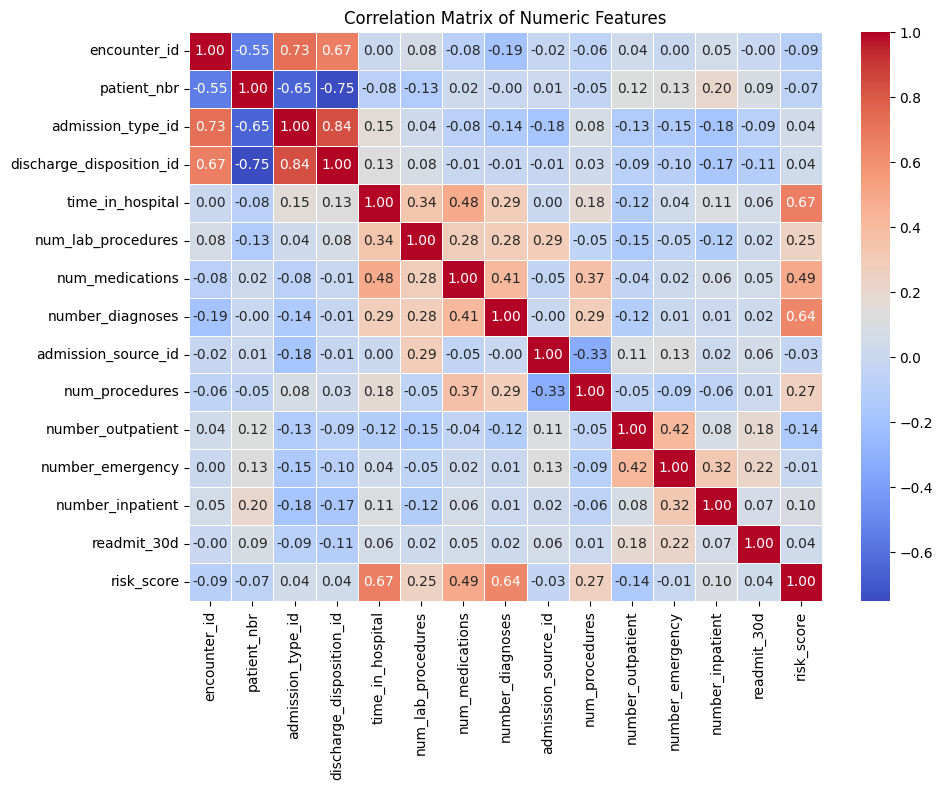

In [8]:
# Plot correlation matrix for visual inspection
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(
    df[numeric_cols].corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5
)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

## 2. Distribution of categorical features

In [9]:
cat_cols = ['race', 'gender', 'age',
            'diag_1', 'diag_2', 'diag_3', 'readmitted', 'diabetesMed', 'insulin',
            'medication_change', 'readmit_30d', 'los_group', 'age_group', 'risk_category']

print("\n=== Category Distribution ===")
# Calculate proportions of each category
for col in cat_cols:
    print(f"{col}: {(df[col].value_counts(normalize = True)*100).round(2)}")


=== Category Distribution ===
race: race
Caucasian           72.87
African American    23.40
Other                3.72
Name: proportion, dtype: float64
gender: gender
Female    52.26
Male      47.74
Name: proportion, dtype: float64
age: age
70-80     23.12
50-60     21.61
60-70     21.61
40-50     12.06
80-90     10.55
30-40      4.52
20-30      3.02
90-100     2.01
10-20      1.01
0-10       0.50
Name: proportion, dtype: float64
diag_1: diag_1
Other       79.90
Diabetes    11.56
CHF          7.04
CKD          1.01
COPD         0.50
Name: proportion, dtype: float64
diag_2: diag_2
Other       69.54
Diabetes    17.77
CKD          6.09
CHF          4.06
COPD         2.54
Name: proportion, dtype: float64
diag_3: diag_3
Other       65.64
Diabetes    23.08
CHF          4.10
CKD          3.59
COPD         3.59
Name: proportion, dtype: float64
readmitted: readmitted
NO     47.74
>30    44.22
<30     8.04
Name: proportion, dtype: float64
diabetesMed: diabetesMed
Yes    83.92
No     16.08
Name:

# 3. Sanity checks based on business rules

In [11]:
# encounter_id must be unique

if df['encounter_id'].is_unique:
    print("encounter_id unique")
else:
    dup_count = df['encounter_id'].duplicated().sum()
    print(f"encounter_id has {dup_count} duplicate rows")

# patient_nbr null check

missing_patients = df['patient_nbr'].isnull().sum()

if missing_patients == 0:
    print("patient_nbr has no missing values")
else:
    print(f"patient_nbr has {missing_patients} missing values")

# time_in_hospital should be >= 1 day

invalid_los = df[df['time_in_hospital'] < 1]
print(f"Invalid LOS rows: {len(invalid_los)}")

# If diabetesMed = 'No', insulin must be 'No'

invalid_med = df[(df['diabetesMed']== 'No') & (df['insulin'] == 'Yes')]
print(f"Inconsistent medication rows: {len(invalid_med)}")

# readmitted values must be valid

valid_readmit = {'NO', '<30', '>30'}

invalid_readmit = df[~df['readmitted'].isin(valid_readmit)]
print(f"Invalid readmitted values: {len(invalid_readmit)}")

# risk_category must align with risk_score

invalid_risk = df[
    ((df['risk_score'] <= 1) & (df['risk_category'] != 'Low')) |
    ((df['risk_score'].between(2, 3)) & (df['risk_category'] != 'Medium')) |
    ((df['risk_score'] > 3) & (df['risk_category'] != 'High'))
]

print(f"Risk classification mismatches: {len(invalid_risk)}")



encounter_id unique
patient_nbr has no missing values
Invalid LOS rows: 0
Inconsistent medication rows: 0
Invalid readmitted values: 0
Risk classification mismatches: 0


## 4. Visual sanity check

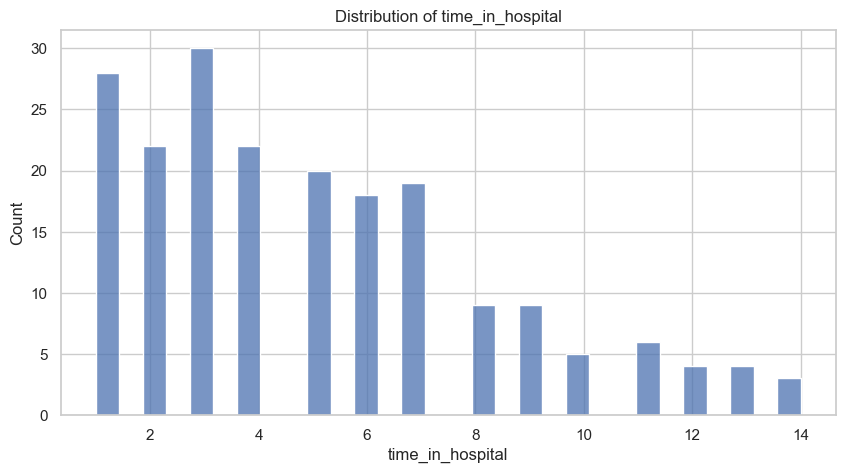

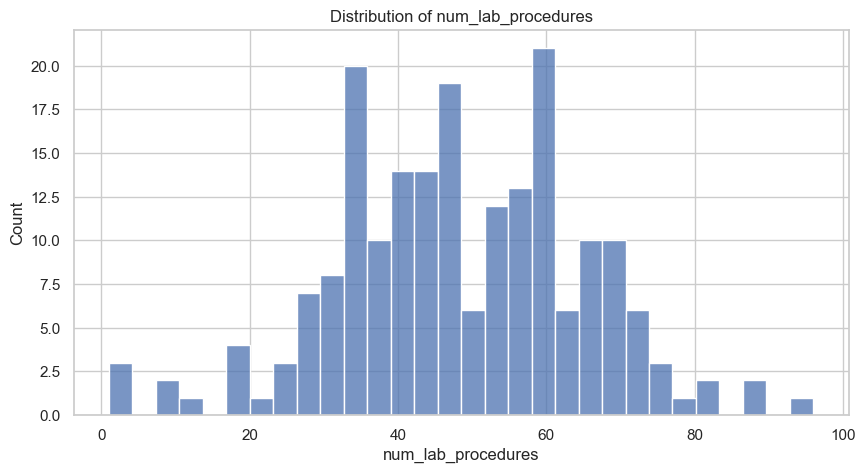

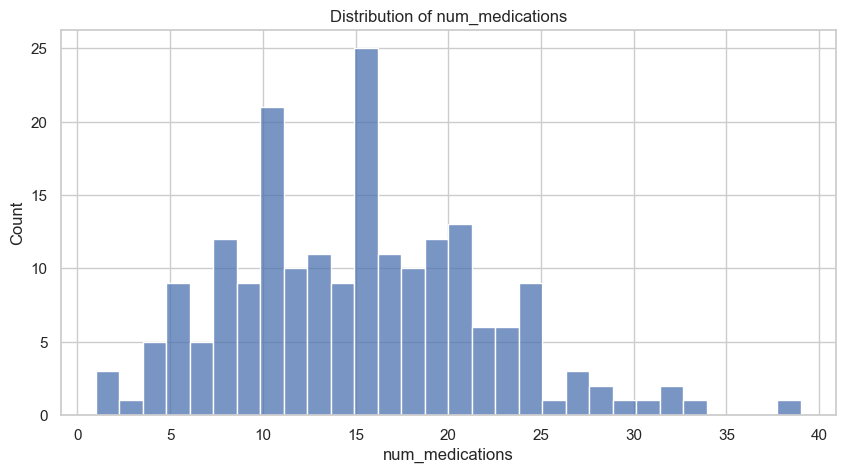

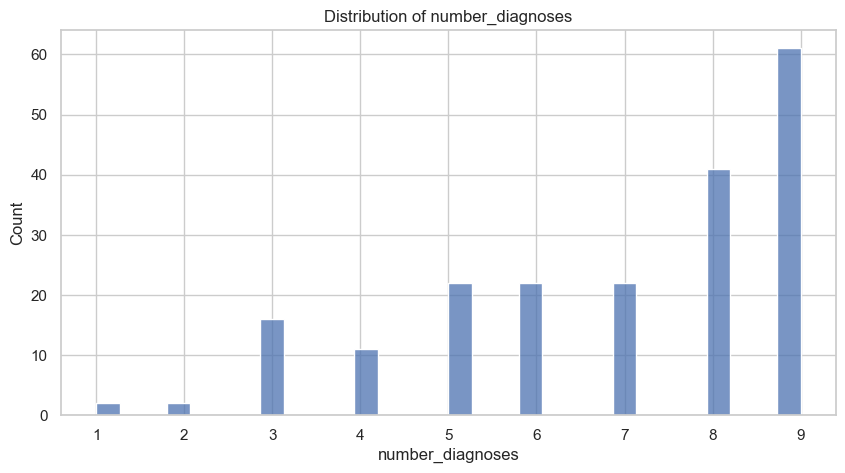

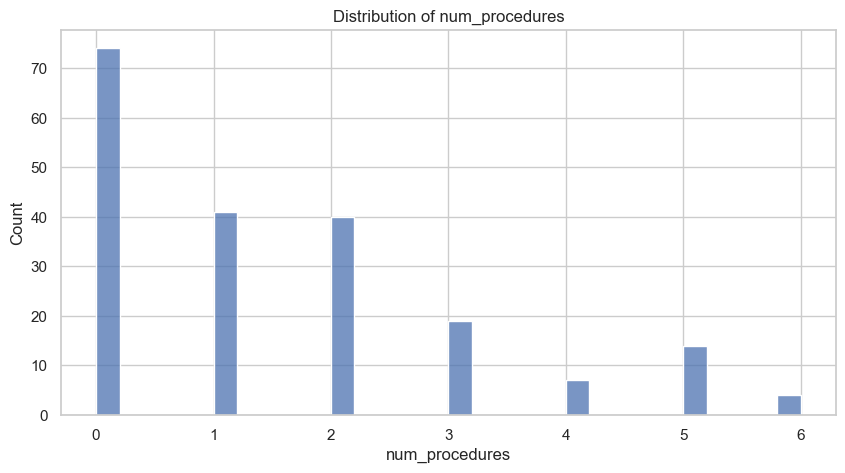

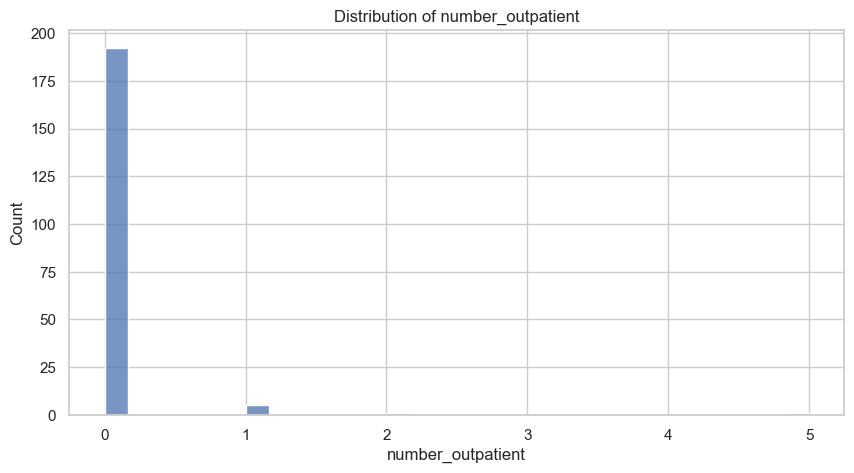

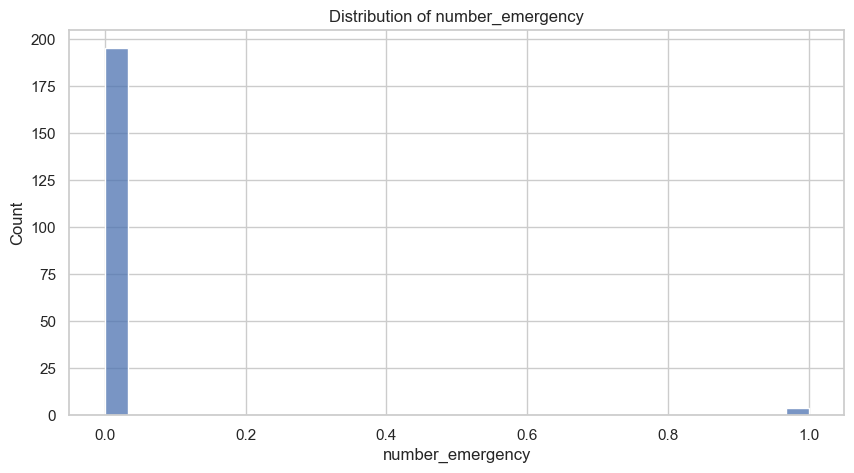

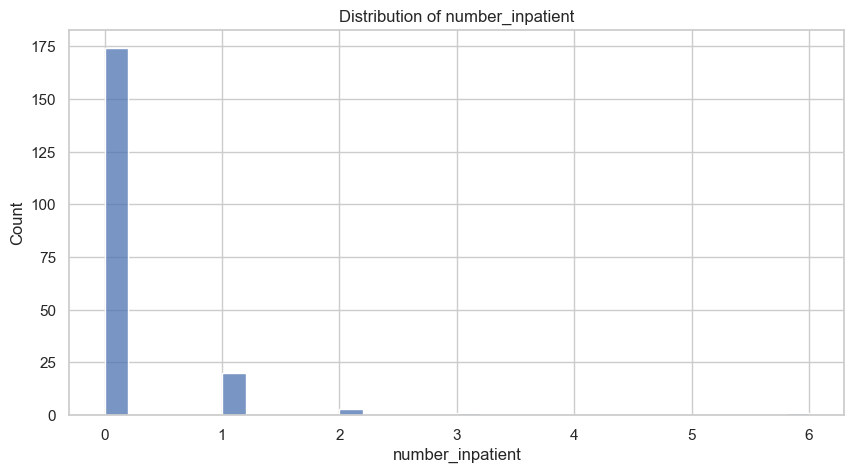

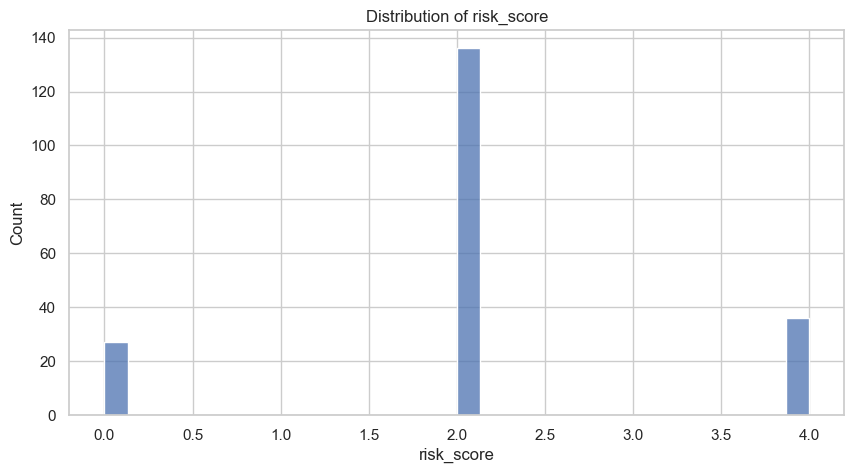

In [12]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

numeric_cols = [
    'time_in_hospital','num_lab_procedures','num_medications',
    'number_diagnoses','num_procedures','number_outpatient',
    'number_emergency','number_inpatient','risk_score'
]

# Histogram for numeric features
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), bins=30, kde=False)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


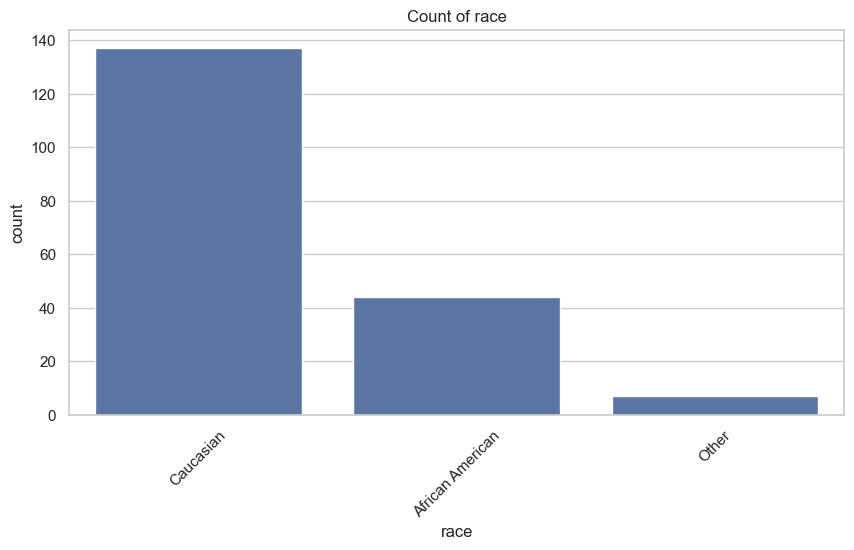

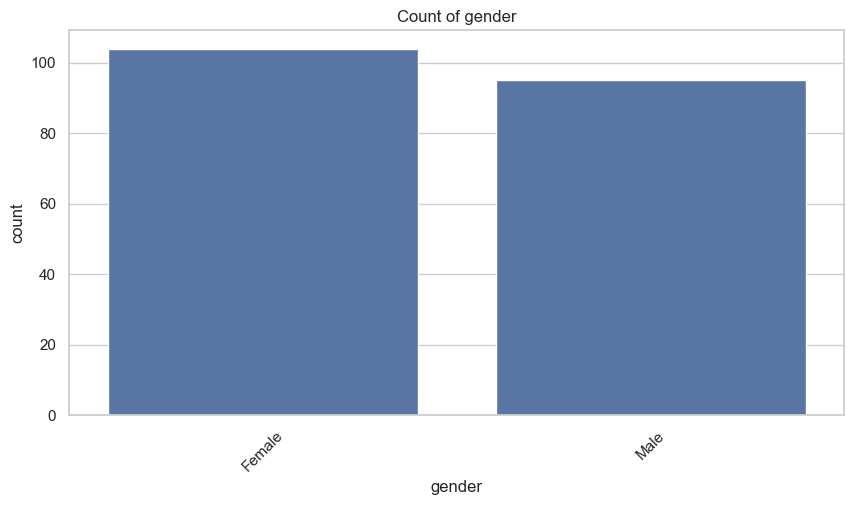

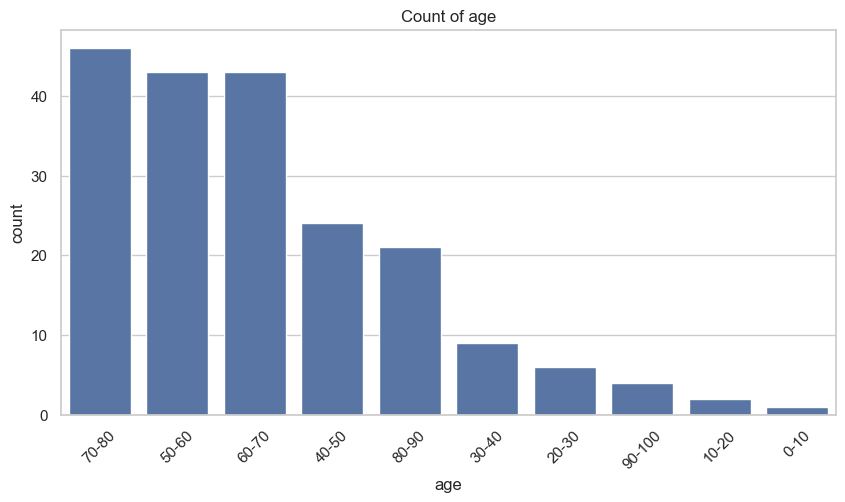

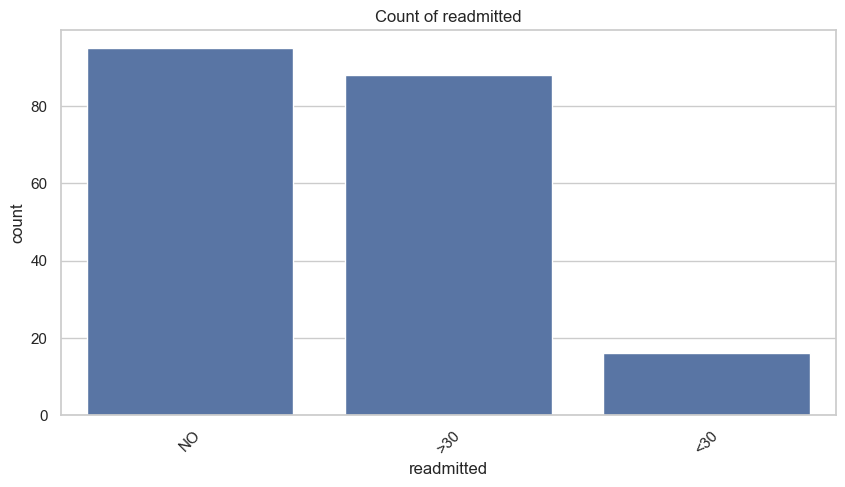

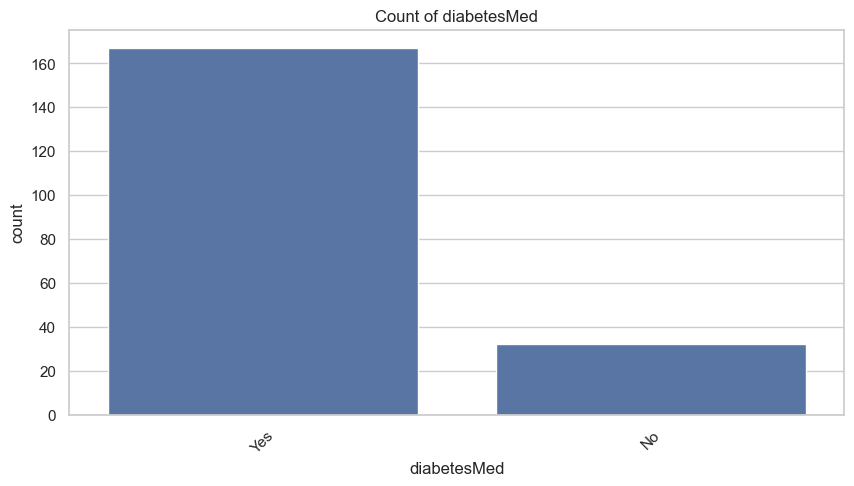

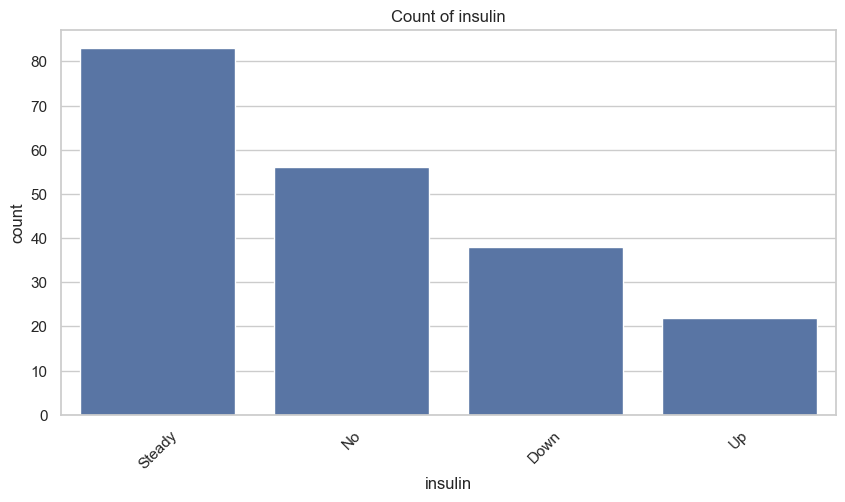

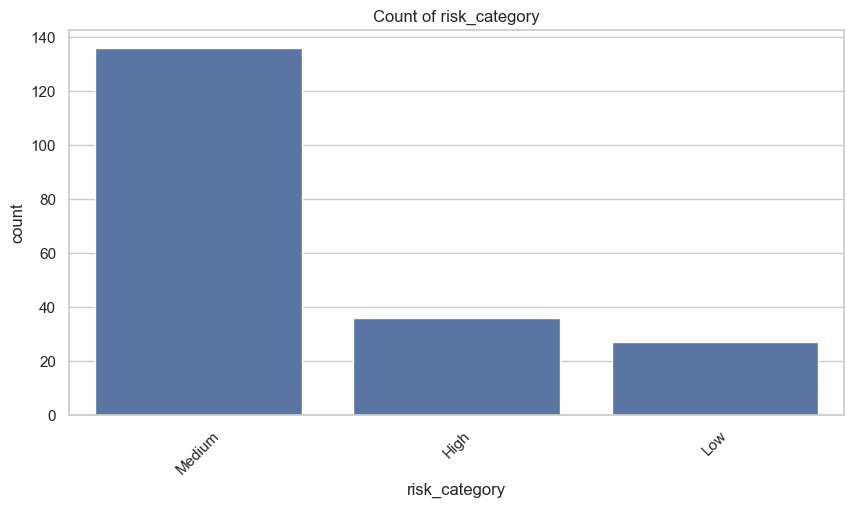

In [14]:
cat_cols = ['race', 'gender', 'age', 'readmitted', 'diabetesMed', 'insulin', 'risk_category']

# Countplots for key categorical variables
for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

## 5. Missing data summary

In [15]:
# Identify missing values in the dataset
missing_summary = df.isna().sum().to_frame(name='missing_count')
missing_summary['missing_pct'] = (missing_summary['missing_count'] / len(df) * 100).round(2)
missing_summary = missing_summary.sort_values(by='missing_pct', ascending=False)

print("=== Missing Data Summary ===")
print(missing_summary)

=== Missing Data Summary ===
                          missing_count  missing_pct
max_glu_serum                       199       100.00
A1Cresult                           199       100.00
medical_specialty                   199       100.00
race                                 11         5.53
diag_3                                4         2.01
diag_2                                2         1.01
gender                                0         0.00
discharge_disposition_id              0         0.00
admission_type_id                     0         0.00
time_in_hospital                      0         0.00
num_lab_procedures                    0         0.00
number_diagnoses                      0         0.00
age                                   0         0.00
encounter_id                          0         0.00
patient_nbr                           0         0.00
readmitted                            0         0.00
diag_1                                0         0.00
num_medications  

## 6. Export to CSV for Tableau

In [16]:
export_path = r"../data/processed/readmissions_final_report.csv"
df.to_csv(export_path, index=False)
print(f"Cleaned dataset saved to {export_path}")

Cleaned dataset saved to ../data/processed/readmissions_final_report.csv
